
Machine Learning – Spotify Hit Şarkılarının Gizemi: Makine Öğrenmesi ile Öngörü Modelleri
Bölüm 1
Müzik Endüstrisinde Başarıyı Tahmin Etmek: Gözetimli Öğrenme ve Veri Analizi 

               1.1 Veri Odaklı Başarı Analizi: Müzik Endüstrisinde Tahmin Modelleri:
  Müzik endüstrisinde bir şarkının başarısını belirleyen faktörleri anlamak, veri odaklı yaklaşımlar sayesinde giderek daha mümkün hale geliyor. Bu çalışma, gözetimli öğrenme tekniklerini kullanarak en çok dinlenen Spotify şarkılarını analiz ediyor ve popülerliğe etki eden özellikleri inceliyor. Korelasyon matrisi, özellik seçimi ve sınıf dengesizliği gibi veri analizi yöntemleriyle şarkıların dinlenme oranlarını tahmin etmeye yönelik bir model geliştiriliyor. Karar ağaçları ve kesinlik/duyarlılık/F1 skoru gibi değerlendirme metrikleriyle tahminlerin doğruluğu test ediliyor. Böylece, müzik yapımcıları ve pazarlamacılar için stratejik içgörüler sunuluyor         

 # Bölüm 2
# 2.1 Veri Analizi ve Görselleştirme için Gerekli Kütüphaneler
   Bu bölümde, veri işleme ve görselleştirme için kullanılan temel kütüphaneleri içe aktarıyoruz.

In [ ]:
import pandas as pd # Veri manipülasyonu ve analizini kolaylaştıran DataFrame yapısını sağlar
import numpy as np  #Çok boyutlu diziler ve hızlı matematiksel işlemler için kullanılır
import seaborn as sns #İstatistiksel veri görselleştirme için Matplotlib'in üzerine kurulu daha gelişmiş bir araç
import matplotlib.pyplot as plt #Grafikler ve görselleştirmeler oluşturmak için temel kütüphane
df = pd.read_csv("C:\\Users\\celal\\Desktop\\Spotify_final_dataset.csv")

Üzerinde Çalışacağımız Dosyayı İçeriye Yükleyelim ve İnceleyeceğimiz Veri Setine Kısa Bir Göz Atalım

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11084 entries, 0 to 11083
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Position                11084 non-null  int64  
 1   Artist Name             11084 non-null  object 
 2   Song Name               11080 non-null  object 
 3   Days                    11084 non-null  int64  
 4   Top 10 (xTimes)         11084 non-null  float64
 5   Peak Position           11084 non-null  int64  
 6   Peak Position (xTimes)  11084 non-null  object 
 7   Peak Streams            11084 non-null  int64  
 8   Total Streams           11084 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 779.5+ KB


# Şekil 2. İçeriye aktardığımız veri seti hakkında genel bilgiler
Şekilde de göründüğü üzere veri setimiz 11084 satır ve 9 sütundan oluşuyor..Şimdi bu satır ve sütunların verileri nasıl sınıflandırdığına bir göz atalım

In [9]:
df.describe()

,Position,Days,Top 10 (xTimes),Peak Position,Peak Streams,Total Streams
count,11084.000000,11084.000000,11084.000000,11084.000000,1.108400e+04,1.108400e+04
mean,5542.500000,53.366925,2.713641,83.070101,5.529469e+05,1.830891e+07
std,3199.819526,129.750902,15.604130,58.932049,6.282936e+05,5.219383e+07
min,1.000000,1.000000,0.000000,1.000000,4.432300e+04,4.432300e+04
25%,2771.750000,2.000000,0.000000,29.000000,2.431595e+05,3.824272e+05
50%,5542.500000,7.000000,0.000000,75.000000,3.505885e+05,1.704876e+06
75%,8313.250000,39.000000,0.000000,132.000000,5.963382e+05,1.078333e+07
max,11084.000000,2547.000000,302.000000,200.000000,7.786096e+06,8.833697e+08


# Tablo 1. Spotify’da 11.084 şarkının verilerini özetleyen bir tablo

•	.Position (Pozisyon) Şarkının listede kaçıncı sırada yer aldığı. → Ortalama olarak şarkılar listenin ortasında yer almış. 
•	Days (Gün Sayısı) Şarkının listede kaç gün kaldığı. → Çoğu şarkı birkaç gün kalıyor, bazıları yıllarca. 
•	Top 10 (xTimes) Şarkının Top 10’a kaç kez girdiği. → Çoğu hiç girmemiş ama bazıları yüzlerce kez girmiş. 
•	Peak Position (En İyi Pozisyon) Şarkının ulaştığı en yüksek (en iyi) sıra. → Bazı şarkılar birinci sıraya kadar çıkmış. 
•	Peak Streams (En Çok Dinlendiği Gün) Bir günde en fazla kaç kere dinlenmiş. → Ortalama yarım milyon, bazıları 7 milyona kadar çıkmış. 6. Total Streams (Toplam Dinlenme Sayısı) Şarkının toplamda kaç kez dinlendiği. → Ortalama 18 milyon, en çok dinlenen 883 milyon
•	count – "Kaç tane veri var?" → Burada tüm sütunlarda 11.084 şarkı var.

•	mean (Ortalama) → O sütundaki sayıların ortalamasıdır.
Örneğin:
o	Days için ortalama: 53.36 → Şarkılar ortalama 53 gün listede kalmış.
o	Total Streams için ortalama: 18.3 milyon → Şarkılar ortalama bu kadar dinlenmiş.

•	std (Standart Sapma) → Verilerin ortalamadan ne kadar sapma gösterdiğini belirtir.
 Büyükse, değerler çok dağılmış demektir.
Örneğin:
o	Top 10 (xTimes) için std: 15.60 → Bazı şarkılar hiç girmemiş, bazıları çok girmiş, yani çok farklılık var.

•	min (Minimum) → En düşük değeri gösterir.
o	Peak Streams min: 44.323 → En az bu kadar dinlenmiş bir şarkı var.
o	Days min: 1 → En kısa süre listede kalan şarkı 1 gün kalmış.

•	25% (1. Çeyrek / Q1) → Verilerin %25’i bu değerden küçük
o	Total Streams için: 382,427 → Şarkıların %25’i bu kadar bile dinlenmemiş.
o	50% (Medyan / Ortanca) → Ortadaki değeri gösterir. Şarkıların yarısı bu değerden az, yarısı fazla

                

        
       Örneğin:
o	Days için: 7 → Şarkıların yarısı 7 gün veya daha az listede kalmış.
•	75% (3. Çeyrek / Q3) → Verilerin %75’i bu değerden küçük.
                       Örneğin:
Top 10 için: 0 → Demek ki şarkıların %75’i hiç Top 10’a girmemiş.

•	max (Maksimum) → En yüksek değeri gösterir.
            Örneğin:
Total Streams max: 883 milyon → En çok dinlenen şarkı bu kadar dinlenmiş.
Top 10 max: 302 → En çok Top 10’a giren şarkı 302 kez girmiş.
Bu istatistikler sayesinde:
•	Ortalama bir şarkının ne kadar dinlendiğini,
•	Ne kadar süre listede kaldığını,
•	Ne kadar başarı gösterdiğini (Top 10’a girme, zirve pozisyon gibi)
görebiliyoruz.


Şimdi listede en çok ve en az dinlenen şarkıların yoğuınluğunu gösteren bir histogram oluşturalım

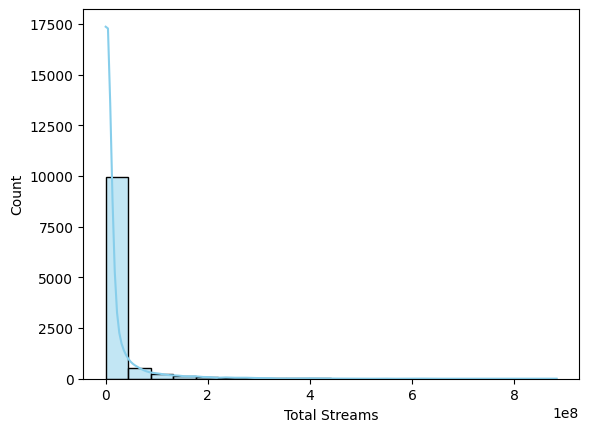

In [13]:
sns.histplot(data=df, x="Total Streams", bins=20, kde=True, color="skyblue")
plt.show()

# Şekil 3. Listede yer alan şarkıların sayısı ve bu şarkıların dinlenme sayısının yoğunluğunu gösteren tablo.
X Ekseni Total Streams(Toplam Dinlenmeler)
Y Ekseni Count (Toplam Şarkı Sayısı)

Grafikten birkaç önemli çıkarım:
•	Yoğunluk düşük dinlenme değerlerinde: Şarkıların büyük bir kısmı düşük dinlenme sayılarına sahip.
•	En yüksek çubuk: 0 ile 2 × 10⁷ dinlenme arasında olan şarkılar 8000’den fazla kez dinlenmiş.
•	Az sayıda popüler şarkı: Çok yüksek dinlenme sayılarına ulaşan şarkılar nispeten az.



# BÖLÜM 3 ÖZELLİKLER ARASI KORELASYON
Bizim amacımız Total Streams(Toplam Dinlenme) sınıfını en çok hangi kriterin etkilediğini bulmak bunun için bir korelasyon matrisi oluşturalım.

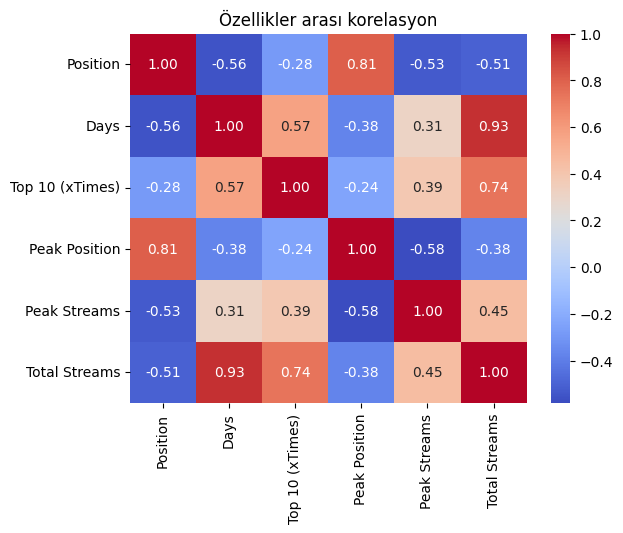

In [15]:
corr = df.corr(numeric_only = True) #sütunlar arası korelasyon
sns.heatmap(corr,annot = True,cmap = "coolwarm",fmt=".2f")
plt.title("Özellikler arası korelasyon")
plt.show()

# Şekil 5. Özellikler arası korelasyon
Korelasyon, iki değişkenin birlikte nasıl değiştiğini gösteren -1 ile +1 arasında bir değerdir:
•	+1 → Çok güçlü pozitif ilişki (biri artarken diğeri de artıyor)
•	-1 → Çok güçlü negatif ilişki (biri artarken diğeri azalıyor)
•	0 → Hiç ilişki yok
Oluşturduğumuz korelasyon matrisine göz atarsak Total Streams(Toplam Dinlenme) sınıfını en çok etkileyen kriterin +0.93 gibi çok güçlü pozitif ilişki ile  “Days” kriteri olduğunu anlıyoruz. Ardından sırayla
•	Top 10 (xTimes) ile Total Streams: +0.74 → Güçlü pozitif ilişki.	
•	Position ile Peak Position: +0.81 → Güçlü pozitif ilişki
•	Peak Position ile Peak Streams: -0.58 → Orta seviye negatif ilşki
•	Position ile Days: -0.56 → Negatif ilişki, Not: Düşük Position = daha iyi sıralama olduğu için burada negatif korelasyon iyi bir şeydir.
Burada +0.74 ile Top 10 (xTimes) ile Total Streams ilişkisini, +0.81 ile Position ile Peak Position ilişkisinin önüne koydum bunun nedenini açıklayalım.
Position ile Peak Position
 Bu iki sütun birbirine çok benzer şeyleri ifade ediyor:
•	Position: Şarkının listedeki sıralaması (genel pozisyonu)
•	Peak Position: En iyi sıraya çıktığı günkü yeri
 Doğal olarak birbirine çok benziyorlar. Yüksek korelasyon beklenir zaten. Bu yüzden her ne kadar korelasyon katsayısı yüksek olsa da daha az anlamlı bir sonuç ortaya çıkar.
Top 10 (xTimes) ve Total Streams
Bu ilişki çok daha anlamlı bir içgörü verir:
•	Top 10’da kalma süresi arttıkça, toplam dinlenme de artıyor.
•	Bu doğrudan bir başarı etkisi gösteriyor.
Bu ilişkinin korelasyon katsayısı daha düşük olsa da analitik açıdan daha kıymetli olabilir.

# 3.2 İLK 50’DE EN SIK GÖRÜLEN TÜRLER
Ve ben bu veri setine daha da anlamlı bir yorum katabilmek için kendim de Şarkı Türü (Song Genre) adı altında bir kriter daha eklemek istiyorum Bunu için ilk 50 şarkıyı seçelim.

In [16]:
df.head(50)

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302.0,1,(x29),2118242,883369738
1,2,Juice WRLD,Lucid Dreams,1673,178.0,1,(x20),2127668,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212.0,1,(x4),1660502,781153024
3,4,J. Cole,No Role Modelz,2547,6.0,7,0,659366,734857487
4,5,Post Malone,rockstar,1223,186.0,1,(x124),2905678,718865961
5,6,Travis Scott,goosebumps,1995,4.0,8,0,977275,672972704
6,7,The Weeknd,Blinding Lights,1100,233.0,1,(x11),2355059,644287953
7,8,XXXTENTACION,Jocelyn Flores,1673,44.0,2,(x1),3175206,624457164
8,9,XXXTENTACION,SAD!,1217,133.0,1,(x6),4437612,619879245
9,10,Juice WRLD,All Girls Are The Same,1681,2.0,5,0,1239152,613872384


# Şekil 6. En çok dinlenen 50 şarkı.

İlk 50 sıradaki şarkıların türü incelendiğinde belirtilen türler ön plana çıkıyor:
Pop türünden 8 adet
Latin pop türünden 5 adet
Rap türünden 23 adet
R&B türünden 5 adet
İndie pop türünden 1 adet
Afrobeats türünden 5 adet
Pop punk türünden 2 adet
Pop ballad türünden 2 adet
Alternative pop rock türünden 2 adet
Edm pop türünden 2 adet
Country türünden 1 adet
Psychedelic Soul türünden de 1 adet müzik türü listeye girmiş bulunmakta
Veri setimize göz attığımızda spotify listelerinin üst sıraları Pop,Rap,Latin Pop ve Afrobeats tarafından domine edildiğini görüyoruz

# LİSTEYE GİRMEK ÖNEMLİ FAKAT LİSTEYE GİRMEK İÇİN NE YAPMAK GEREK ?
  Bölüm 3.2 de bahsettiğimiz en çok dinlenen ilk 50 şarkının ortak özellikleini analiz ettiğimizde 50 şarkının 
50 sinde de listeye girmek için benzer pazarlama stratejileri ortaya çıkıyor bunlara örnek olarak:
1.	 TikTok ve Kısa Video Platformları
o	En etkili yöntemlerden biri.
o	Sanatçılar veya etiketler, şarkının bir kısmını viral olabilecek şekilde “challenge” veya kısa video trendi haline getiriyor.
o	Özellikle genç dinleyici kitlesine ulaşmak için çok güçlü.

2.	Influencer ve İçerik Üreticisi İşbirlikleri
o	Popüler içerik üreticilerine şarkı ile ilgili reels/video çektirmek.
o	Bu, şarkının milyonlara hızlıca ulaşmasını sağlar.

3.	Sosyal Medya Reklamları ve Algoritmalar
o	İnstagram, YouTube, TikTok ve Spotify reklamları kullanılarak hedef kitleye direkt ulaşılır.
o	Özellikle “dinlemeye teşvik eden” kısa reklamlar kullanılır (örneğin: “Bu yazın hiti burada!”)

4.	İşbirlikleri ve Düetler (Feat.)
o	Popüler sanatçılarla düet yapmak, şarkının erişimini artırır.
o	Dinleyici başka bir sanatçının hayranıyken bu şarkıya da maruz kalır. 

5.	Algoritma Odaklı Yayın Planlanması
o	Şarkı, gün ve saat olarak algoritmanın en aktif olduğu zamanlarda yayınlanır (örneğin Cuma günleri).
o	Aynı anda klip, sosyal medya postu ve Spotify kampanyası başlatılır → çarpan etkisi yaratır.



# BÖLÜM 4 SONUÇ

Eğer yayınladığınız bir şarkının dinlenmesinin artmasını istiyorsak öncelikle güzel bir pazarlama stratejisi
ile listelere girmesini sağlamamız gereklidir oluşturduğumuz korelasyon matrisinde dinlenmeyi en çok etkileyen faktörün şarkının 
listede ne kadar kaldığı faktörünün olduğunu görüyoruz. Yaptığımız bir başka analizde ise bir şarkının listeye girmesi hangi tür müzik 
için daha kolay olur sorusunun cevabını aramıştık bu analizimizin cevabını olarak çoğunlukla rap türünün daha çok dinlendiği 
ve listelerde yer aldığını görüyoruz bu çalışmanın amacı yapımcı firmalara spotify listelerini analiz ederek onlar adına bir Pazar 
araştırmasının yapılmasıdır. Yapılan analizlere göre bir rap sanatçısının güzel bir pazarlama ile diğer müzik türlerine göre listelere 
girmesi daha kolay görünüyor.









